In [1]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
#https://drive.google.com/file/d/15vtzJuiI-3POTLUYp87-ZKUESFJApglc/view?usp=sharing
#https://drive.google.com/file/d/1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4/view?usp=sharing  
#https://drive.google.com/file/d/1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh/view?usp=sharing   Corregido
!gdown --id "1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4"
!gdown --id "1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh"
#https://drive.google.com/file/d/1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu/view?usp=sharing
#https://drive.google.com/file/d/1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6/view?usp=sharing
#https://drive.google.com/file/d/1Q694dPk7a7BjIAJjP3g_G9H0RTDuB_xl/view?usp=sharing
!gdown --id "1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu"
!gdown --id "1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6"
!gdown --id "1Q694dPk7a7BjIAJjP3g_G9H0RTDuB_xl"

Downloading...
From: https://drive.google.com/uc?id=1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4
To: /content/Motor_Monofasico_2_2.csv
100% 116k/116k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh
To: /content/Motor_Monofasico_2_2_rms.csv
100% 107k/107k [00:00<00:00, 31.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu
To: /content/Motor_trifasico_Para_entrenamiento.csv
100% 118k/118k [00:00<00:00, 43.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6
To: /content/Motor_trifasico_Para_Prediccion.csv
100% 15.3k/15.3k [00:00<00:00, 22.5MB/s]


In [2]:
def graficar_resultado(Valor_real, Valor_prediccion):
    plt.figure(figsize=(32,15))
    plt.plot(Valor_real[0:len(Valor_prediccion)],color='red', label='Dato Real del sensor')
    plt.plot(Valor_prediccion, color='blue', label='Dato predicho')
   # plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor V en m/s2')
    plt.legend()
    plt.show()

In [3]:
#
# Lectura de los datos
#
dataset = pd.read_csv('datos_prueba_3_3000_reg.csv', index_col='Datos_fch_hr', parse_dates=['Datos_fch_hr'])
dataset.head()


,Datos_eje_x,Datos_eje_y,Datos_eje_z,Datos_tmp_s,Datos_tmp_loc
Datos_fch_hr,,,,,
2021-10-26 01:43:51,0.05,0.47,-9.35,0,\N
2021-10-26 01:43:52,0.11,0.71,-10.01,0,\N
2021-10-26 01:43:53,0.03,0.09,-10.25,0,\N
2021-10-26 01:43:54,-0.04,0.19,-10.33,0,\N
2021-10-26 01:43:55,0.00,0.36,-10.09,0,\N


2/2 [==============================] - 0s 32ms/step


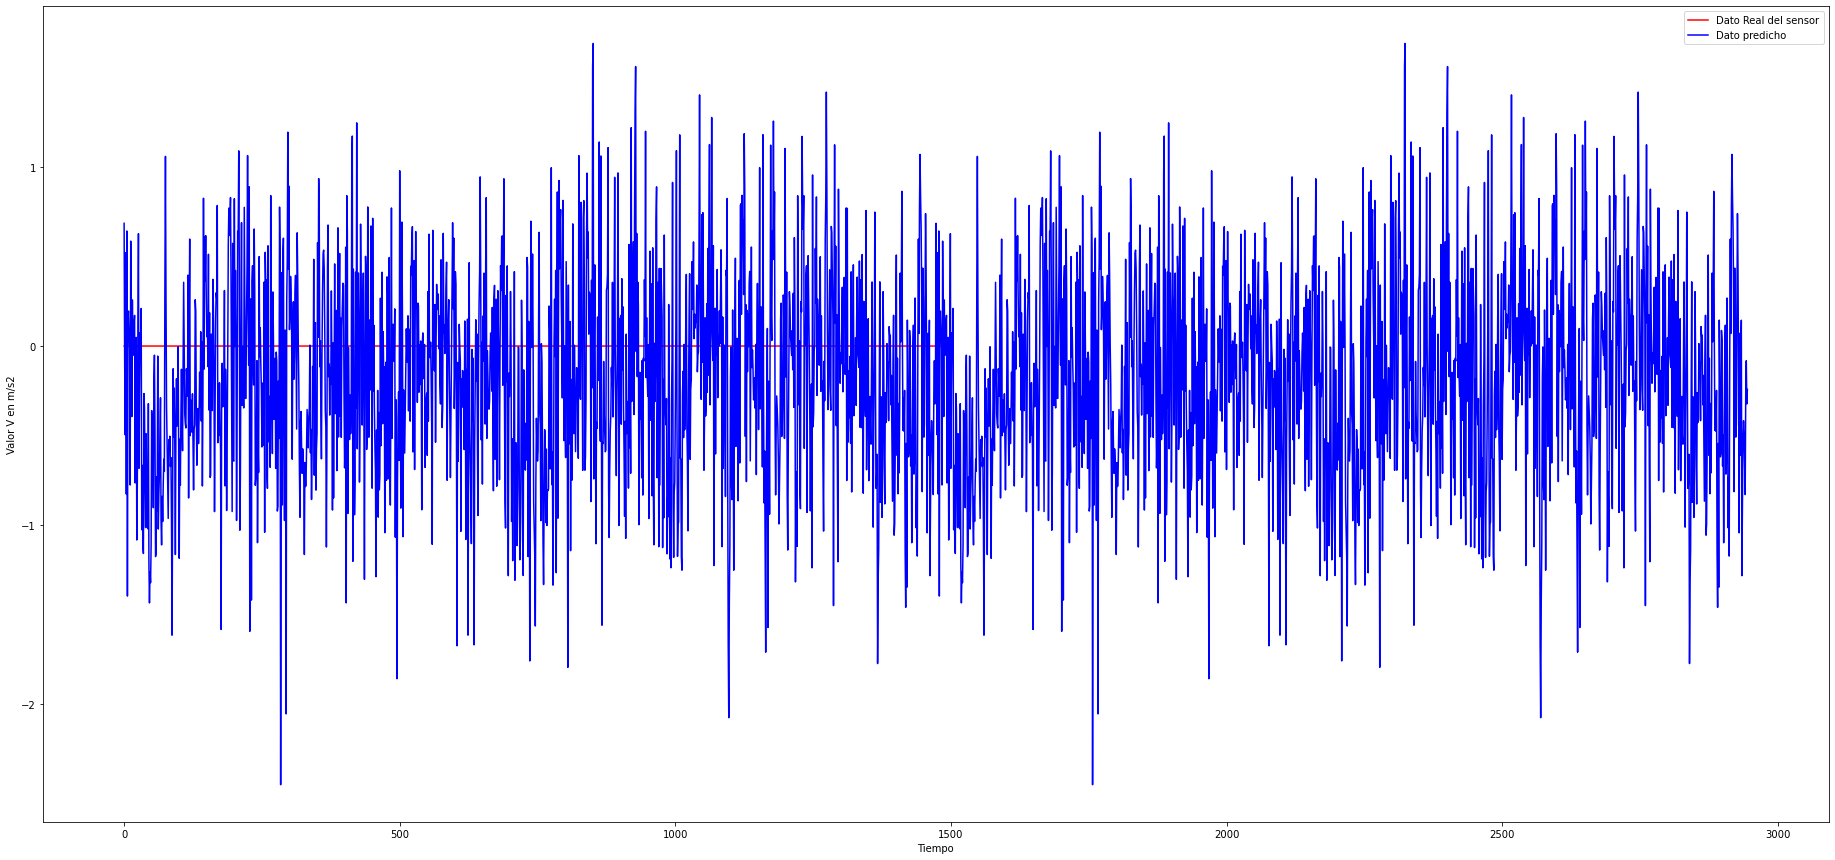

In [29]:
#
# Lectura extendida de valores  - 1500 para el test 3 
# Ejecutar despues de hacer el entrenamiento
#
prediccion_larga = pd.read_csv('Prediccion_Larga_Total_.csv', index_col='Datos_fch_hr', parse_dates=['Datos_fch_hr'])
prediccion_larga.head()

validacion_final = prediccion_larga['26-10-2021 00:00:01':].iloc[:,1:2]
prueba = validacion_final.values
sc = MinMaxScaler(feature_range=(-1,1))
set_entrenamiento_sensor_escalado = sc.fit_transform(set_entrenamiento_sensor)

X_test = []
for i in range(time_step,len(prueba)):
    X_test.append(prueba[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion_extendida = modelo.predict(X_test,steps=2,verbose=1,workers=12)
prediccion_extendida = sc.inverse_transform(prediccion_extendida)
result = np.clip(validacion_final.values, -0.00001, 0.000001)
# Graficar resultados
graficar_resultado(result,prediccion_extendida)

#Sacar informacion de los graficos , Vs los resultados
np.savetxt("Datos_predichos_extendido.txt", prediccion_extendida,fmt="%.5f", delimiter=",", newline="\n")





In [19]:
print(X_test[0])

[[-0.6 ]
 [ 0.6 ]
 [-0.04]
 [-0.01]
 [ 0.49]
 [-0.45]
 [ 0.56]
 [ 0.16]
 [ 0.34]
 [-0.72]
 [-0.5 ]
 [ 0.91]
 [-0.19]
 [ 0.36]
 [-0.44]
 [ 0.72]
 [-0.26]
 [ 0.02]
 [ 0.42]
 [-0.27]
 [-0.43]
 [ 0.17]
 [-0.07]
 [ 0.56]
 [-0.32]
 [ 0.28]
 [-0.52]
 [-0.11]
 [ 0.61]
 [-0.4 ]]


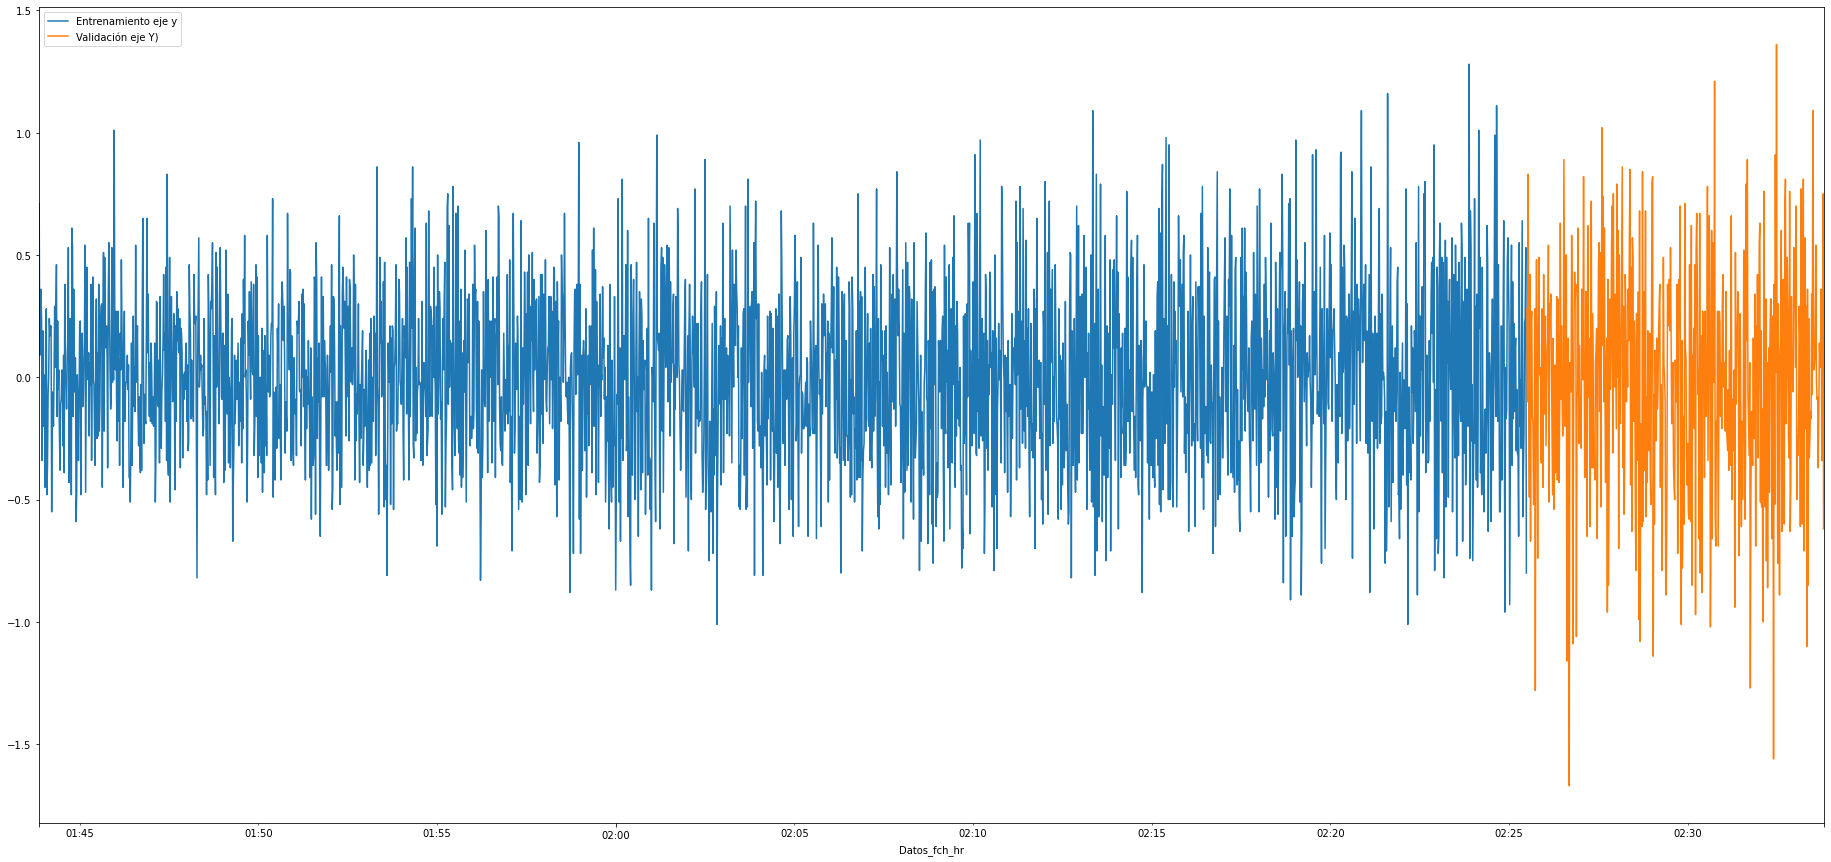

In [4]:


#
# DAtos de validacion y entrenamiento
# La LSTM se entrenaria con los datos provenientes de la base de datos 
# Es un entrenamiento / dataset, para cada sensor
#
set_entrenamiento_sensor = dataset[:'26-10-2021 2:25:29'].iloc[:,1:2]
set_validacion_sensor = dataset['26-10-2021 2:25:30':].iloc[:,1:2]
plt.figure(figsize=(32,15))
set_entrenamiento_sensor['Datos_eje_y'].plot(legend=True)
set_validacion_sensor['Datos_eje_y'].plot(legend=True)

plt.legend(['Entrenamiento eje y', 'Validación eje Y)'])
plt.show()

# Se normalizan los datos para la lstm
sc = MinMaxScaler(feature_range=(-1,1))
set_entrenamiento_sensor_escalado = sc.fit_transform(set_entrenamiento_sensor)

In [5]:
set_validacion_sensor.head()

,Datos_eje_y
Datos_fch_hr,
2021-10-26 02:25:30,0.28
2021-10-26 02:25:31,-0.10
2021-10-26 02:25:32,0.83
2021-10-26 02:25:33,-0.03
2021-10-26 02:25:34,-0.49


In [5]:

# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step = 30
X_train = []
Y_train = []
m = len(set_entrenamiento_sensor_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_sensor_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_sensor_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:

#
# Red LSTM
#
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 32
inicio = int(round(time.time() * 1000))

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
#modelo.compile(optimizer='rmsprop', loss='mse')
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=800,batch_size=16)

fin = int(round(time.time() * 1000))
print(inicio,fin)

Epoch 1/800
2469/2469 [==============================] - 1s 503us/step - loss: 0.0949
Epoch 2/800
2469/2469 [==============================] - 1s 367us/step - loss: 0.0943
Epoch 3/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0940
Epoch 4/800
2469/2469 [==============================] - 1s 364us/step - loss: 0.0940
Epoch 5/800
2469/2469 [==============================] - 1s 372us/step - loss: 0.0939
Epoch 6/800
2469/2469 [==============================] - 1s 365us/step - loss: 0.0939
Epoch 7/800
2469/2469 [==============================] - 1s 372us/step - loss: 0.0939
Epoch 8/800
2469/2469 [==============================] - 1s 383us/step - loss: 0.0939
Epoch 9/800
2469/2469 [==============================] - 1s 427us/step - loss: 0.0938
Epoch 10/800
2469/2469 [==============================] - 1s 355us/step - loss: 0.0937
Epoch 11/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0936
Epoch 12/800
2469/2469 [============================

Epoch 95/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0908
Epoch 96/800
2469/2469 [==============================] - 1s 350us/step - loss: 0.0906
Epoch 97/800
2469/2469 [==============================] - 1s 365us/step - loss: 0.0907
Epoch 98/800
2469/2469 [==============================] - 1s 371us/step - loss: 0.0905
Epoch 99/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0904
Epoch 100/800
2469/2469 [==============================] - 1s 385us/step - loss: 0.0904
Epoch 101/800
2469/2469 [==============================] - 1s 378us/step - loss: 0.0900
Epoch 102/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0898
Epoch 103/800
2469/2469 [==============================] - 1s 365us/step - loss: 0.0902
Epoch 104/800
2469/2469 [==============================] - 1s 356us/step - loss: 0.0900
Epoch 105/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0898
Epoch 106/800
2469/2469 [============

2469/2469 [==============================] - 1s 353us/step - loss: 0.0761
Epoch 188/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0761
Epoch 189/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0766
Epoch 190/800
2469/2469 [==============================] - 1s 350us/step - loss: 0.0759
Epoch 191/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0758
Epoch 192/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0756
Epoch 193/800
2469/2469 [==============================] - 1s 350us/step - loss: 0.0751
Epoch 194/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0746
Epoch 195/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0744
Epoch 196/800
2469/2469 [==============================] - 1s 350us/step - loss: 0.0750
Epoch 197/800
2469/2469 [==============================] - 1s 353us/step - loss: 0.0743
Epoch 198/800
2469/2469 [=====================

Epoch 280/800
2469/2469 [==============================] - 1s 513us/step - loss: 0.0596
Epoch 281/800
2469/2469 [==============================] - 1s 413us/step - loss: 0.0591
Epoch 282/800
2469/2469 [==============================] - 1s 369us/step - loss: 0.0596
Epoch 283/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0587
Epoch 284/800
2469/2469 [==============================] - 1s 358us/step - loss: 0.0587
Epoch 285/800
2469/2469 [==============================] - 1s 368us/step - loss: 0.0582
Epoch 286/800
2469/2469 [==============================] - 1s 385us/step - loss: 0.0581
Epoch 287/800
2469/2469 [==============================] - 1s 376us/step - loss: 0.0588
Epoch 288/800
2469/2469 [==============================] - 1s 383us/step - loss: 0.0577
Epoch 289/800
2469/2469 [==============================] - 1s 363us/step - loss: 0.0582
Epoch 290/800
2469/2469 [==============================] - 1s 371us/step - loss: 0.0584
Epoch 291/800
2469/2469 [=======

2469/2469 [==============================] - 1s 373us/step - loss: 0.0409
Epoch 374/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0415
Epoch 375/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0406
Epoch 376/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0407
Epoch 377/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0408
Epoch 378/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0402
Epoch 379/800
2469/2469 [==============================] - 1s 354us/step - loss: 0.0407
Epoch 380/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0397
Epoch 381/800
2469/2469 [==============================] - 1s 381us/step - loss: 0.0396
Epoch 382/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0407
Epoch 383/800
2469/2469 [==============================] - 1s 354us/step - loss: 0.0393
Epoch 384/800
2469/2469 [=====================

2469/2469 [==============================] - 1s 407us/step - loss: 0.0275
Epoch 467/800
2469/2469 [==============================] - 1s 374us/step - loss: 0.0278
Epoch 468/800
2469/2469 [==============================] - 1s 366us/step - loss: 0.0275
Epoch 469/800
2469/2469 [==============================] - 1s 366us/step - loss: 0.0270
Epoch 470/800
2469/2469 [==============================] - 1s 357us/step - loss: 0.0273
Epoch 471/800
2469/2469 [==============================] - 1s 365us/step - loss: 0.0275
Epoch 472/800
2469/2469 [==============================] - 1s 360us/step - loss: 0.0272
Epoch 473/800
2469/2469 [==============================] - 1s 369us/step - loss: 0.0265
Epoch 474/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0272
Epoch 475/800
2469/2469 [==============================] - 1s 354us/step - loss: 0.0266
Epoch 476/800
2469/2469 [==============================] - 1s 367us/step - loss: 0.0272
Epoch 477/800
2469/2469 [=====================

Epoch 559/800
2469/2469 [==============================] - 1s 381us/step - loss: 0.0193
Epoch 560/800
2469/2469 [==============================] - 1s 360us/step - loss: 0.0180
Epoch 561/800
2469/2469 [==============================] - 1s 354us/step - loss: 0.0194
Epoch 562/800
2469/2469 [==============================] - 1s 348us/step - loss: 0.0188
Epoch 563/800
2469/2469 [==============================] - 1s 358us/step - loss: 0.0176
Epoch 564/800
2469/2469 [==============================] - 1s 358us/step - loss: 0.0186
Epoch 565/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0184
Epoch 566/800
2469/2469 [==============================] - 1s 370us/step - loss: 0.0175
Epoch 567/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0182
Epoch 568/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0182
Epoch 569/800
2469/2469 [==============================] - 1s 367us/step - loss: 0.0180
Epoch 570/800
2469/2469 [=======

2469/2469 [==============================] - 1s 354us/step - loss: 0.0126
Epoch 653/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0127
Epoch 654/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0125
Epoch 655/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0124
Epoch 656/800
2469/2469 [==============================] - 1s 374us/step - loss: 0.0128
Epoch 657/800
2469/2469 [==============================] - 1s 364us/step - loss: 0.0127
Epoch 658/800
2469/2469 [==============================] - 1s 375us/step - loss: 0.0126
Epoch 659/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0122
Epoch 660/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0124
Epoch 661/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0124
Epoch 662/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0129
Epoch 663/800
2469/2469 [=====================

2469/2469 [==============================] - 1s 360us/step - loss: 0.0092
Epoch 746/800
2469/2469 [==============================] - 1s 355us/step - loss: 0.0092
Epoch 747/800
2469/2469 [==============================] - 1s 358us/step - loss: 0.0097
Epoch 748/800
2469/2469 [==============================] - 1s 352us/step - loss: 0.0095
Epoch 749/800
2469/2469 [==============================] - 1s 356us/step - loss: 0.0094
Epoch 750/800
2469/2469 [==============================] - 1s 361us/step - loss: 0.0091
Epoch 751/800
2469/2469 [==============================] - 1s 363us/step - loss: 0.0091
Epoch 752/800
2469/2469 [==============================] - 1s 382us/step - loss: 0.0090
Epoch 753/800
2469/2469 [==============================] - 1s 381us/step - loss: 0.0091
Epoch 754/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0090
Epoch 755/800
2469/2469 [==============================] - 1s 379us/step - loss: 0.0091
Epoch 756/800
2469/2469 [=====================

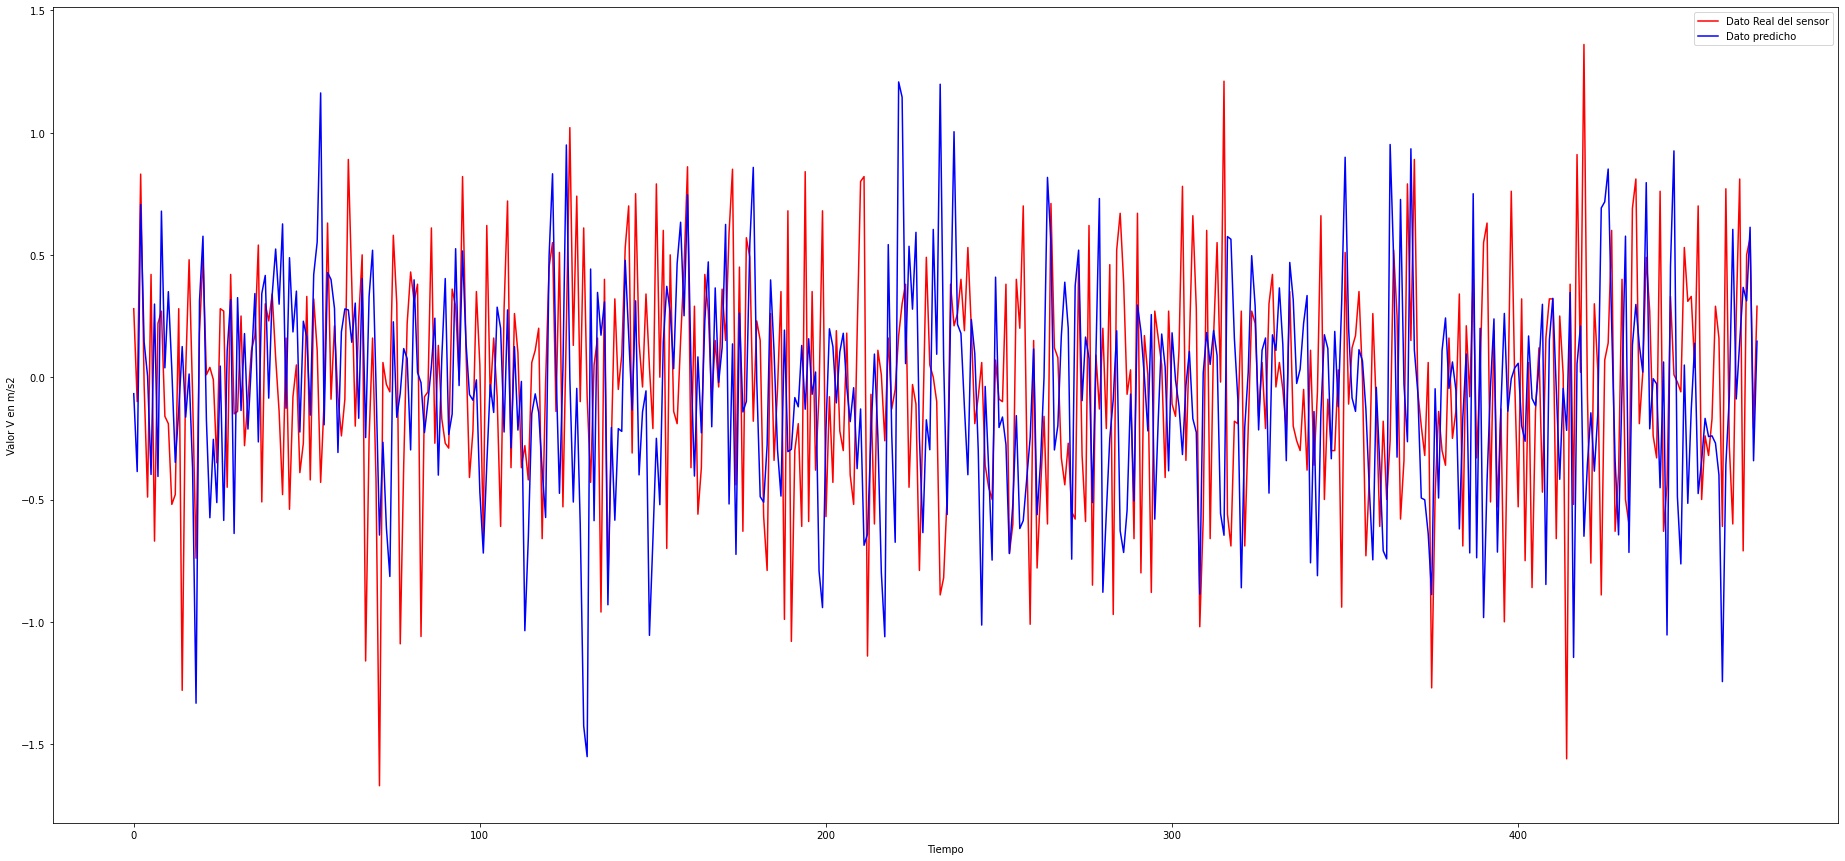

In [11]:

#
# Validación (predicción del valor de las acciones)
#
x_test = set_validacion_sensor.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

# Graficar resultados
graficar_resultado(set_validacion_sensor.values,prediccion)

In [38]:
#Sacar informacion de los graficos , Vs los resultados
np.savetxt("Datos_reales_exp_2_2.txt", set_validacion_sensor.values,fmt="%.5f", delimiter=",", newline="\n")
np.savetxt("Datos_predichos_exp_2_4.txt", prediccion,fmt="%.5f", delimiter=",", newline="\n")

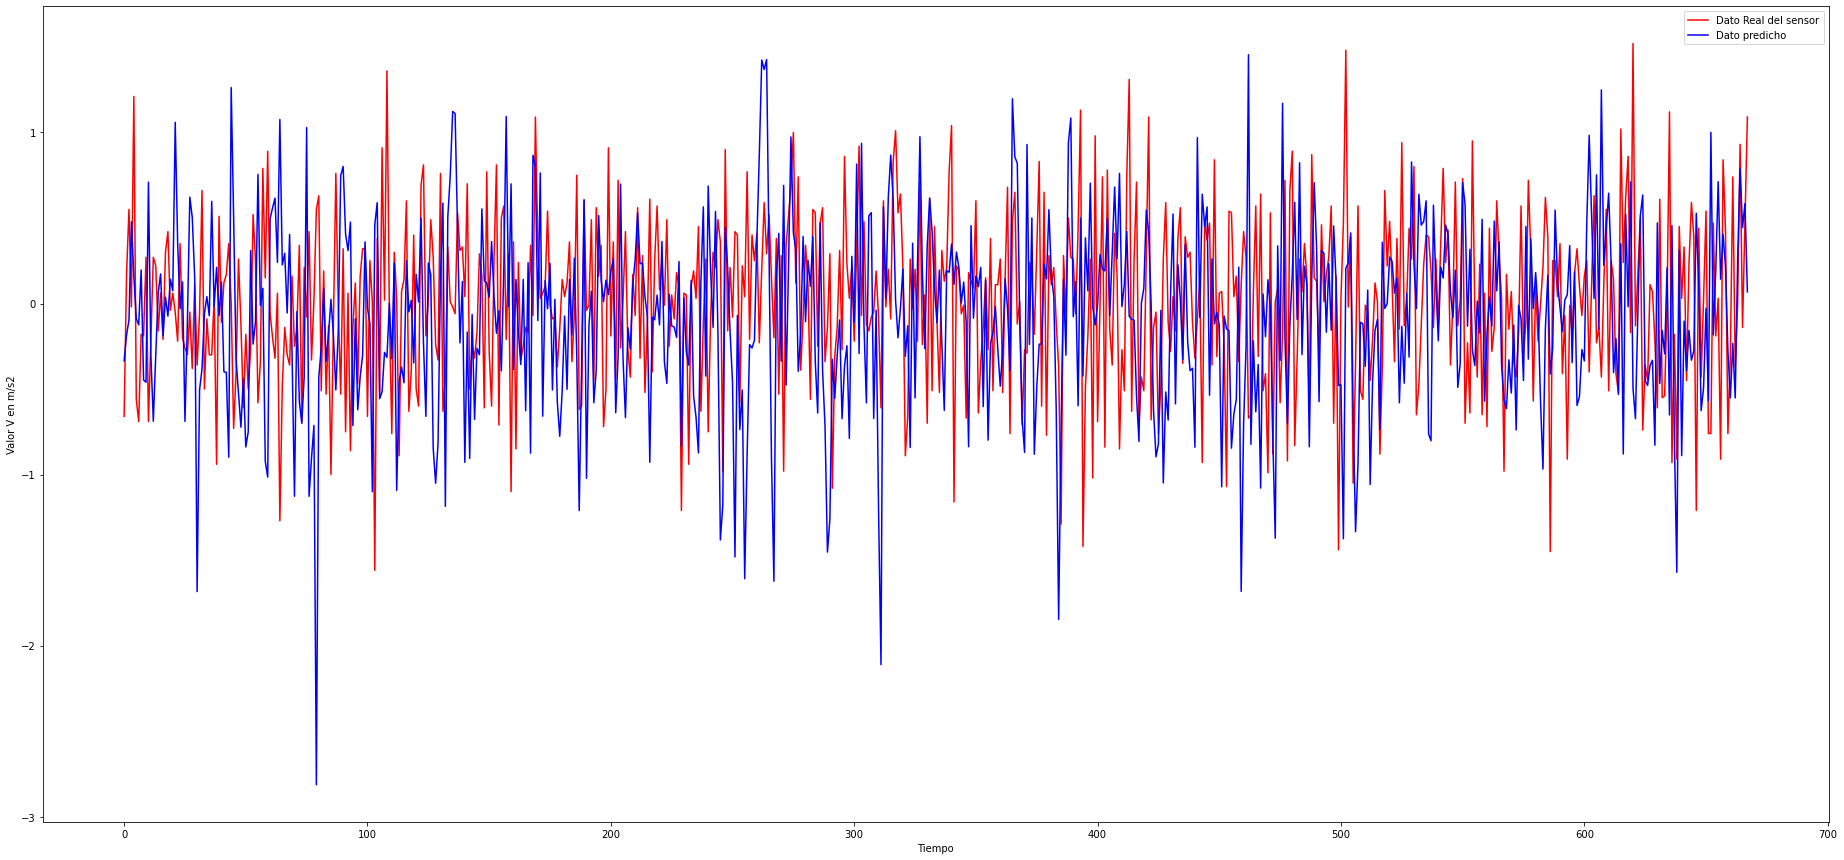

In [13]:

#
# Validación (predicción del valor de las acciones)
#
x_test = set_validacion_sensor.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

# Graficar resultados
graficar_resultado(set_validacion_sensor.values,prediccion)

In [78]:
def agregarNuevoValor(X_test,nuevoValor):
    for i in range(X_test.shape[2]-1):
        X_test[0][0][i] = X_test[0][0][i+1]
    X_test[0][0][X_test.shape[2]-1]=nuevoValor
    return X_test
 
results=[]
for i in range(1500):
    parcial=modelo.predict(X_test)
    results.append(parcial[0])
   # print(X_test)
    X_test=agregarNuevoValor(X_test,parcial[0])
    


La desviacion es :
1.490867
[[3.1668112 ]
 [1.1808732 ]
 [5.4077954 ]
 [3.2306535 ]
 [2.6929007 ]
 [1.134214  ]
 [3.832157  ]
 [1.1028557 ]
 [5.3035717 ]
 [2.8228142 ]
 [4.028874  ]
 [2.7982905 ]
 [1.3256519 ]
 [2.1485138 ]
 [3.1595104 ]
 [2.0421035 ]
 [2.7253878 ]
 [1.2338892 ]
 [2.486428  ]
 [3.8838415 ]
 [4.9063773 ]
 [1.9905585 ]
 [0.44984755]
 [1.6912552 ]
 [0.6893618 ]
 [2.850789  ]
 [0.40730798]
 [3.0954566 ]
 [3.9025881 ]
 [0.20074435]
 [3.9335725 ]
 [2.1471243 ]
 [3.3652427 ]
 [1.8541133 ]
 [2.8921192 ]
 [3.9984465 ]
 [1.6498451 ]
 [3.999818  ]
 [4.28528   ]
 [2.3431275 ]
 [3.9806378 ]
 [4.7036552 ]
 [3.8309455 ]
 [5.1010804 ]
 [2.182808  ]
 [4.566251  ]
 [3.3912814 ]
 [4.037552  ]
 [1.8068423 ]
 [3.5610886 ]
 [3.3020198 ]
 [2.0740821 ]
 [4.30094   ]
 [4.8134446 ]
 [7.174365  ]
 [1.9206662 ]
 [4.3318133 ]
 [4.2217636 ]
 [3.7650862 ]
 [1.4825336 ]
 [3.3926244 ]
 [3.7557237 ]
 [3.7394116 ]
 [3.2270393 ]
 [3.848301  ]
 [2.0245047 ]
 [4.236798  ]
 [1.7187488 ]
 [3.9546695 ]
 [4.68

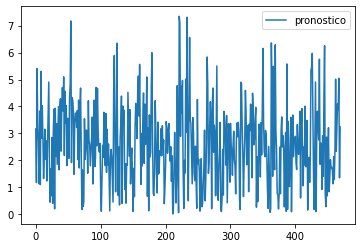

In [105]:
parcial = sc.inverse_transform(parcial)
#print(parcial)
cuadrado=np.absolute(parcial)
prediccion1SemanaDiciembre = pd.DataFrame(cuadrado)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico_X.csv')
st_dev = np.std(cuadrado)
print("La desviacion es :")
print(st_dev)
print(cuadrado)

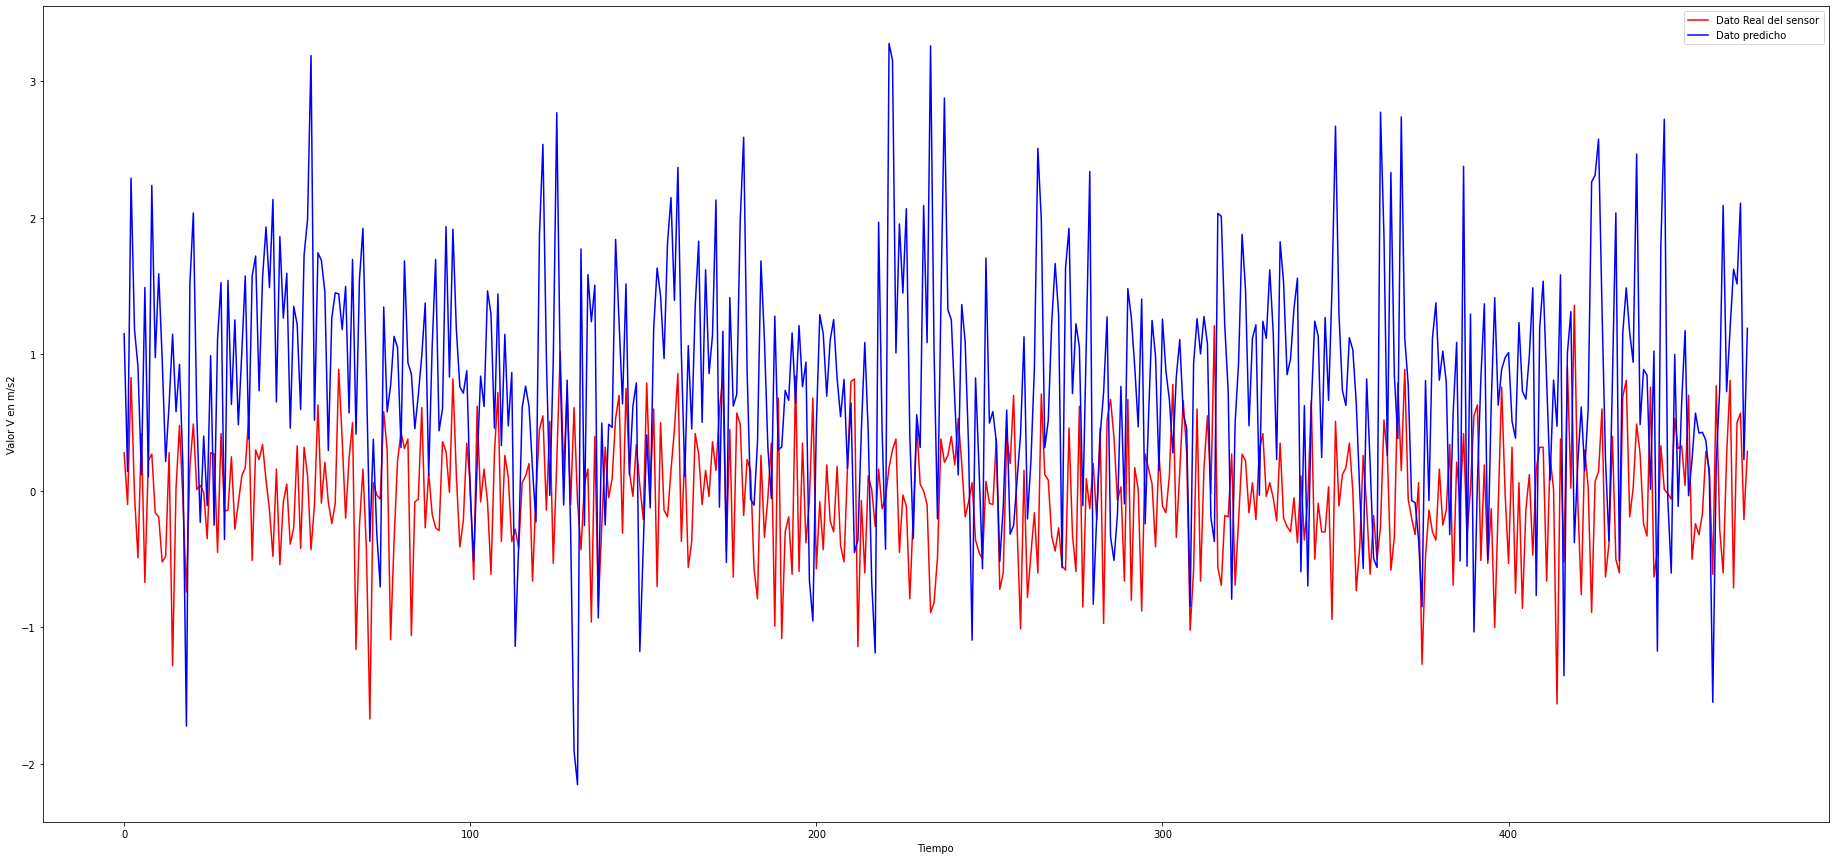

In [100]:
graficar_resultado(set_validacion_sensor.values,parcial)